# Predicting Wine Quality and Pricing at Market
**Introduction**
Very Good Wines company produces their own wine and are in need of a tool to price their "Vihno Verde" wine, based on predicted quality, before going to market. The solution is to build a predictive model that can provide a quality assessment of a sample of wine prior to bottling. 

Access the production level model at this web application: https://wine-quality-classifier.herokuapp.com/

## Contents
1. Business Problem
2. Data
3. Features
4. Data Analysis and Manipulation
3. Modeling/Cross-validation
4. Results
5. Pricing at Market
6. Conclusion

## 1. Business Problem
Very Good Wine is a wine producing company who is attentive to the quality of their wine at bottling. They spend many years fermenting a batch of wine and currently sample the quality of their wine by sampling the taste. If the wine passes the taste test Very Good Wine will price the wind and send the wine to market. The issue that remains is: Is the wine priced accurately? If the wine is priced too low the company is losing profit margins on high quality wine; if the wine is priced too high the company is at risk of losing consumers. Therefore, Vera Butler Design is creating this Jupyter Notbook that Very Good Wine can use to accurately price it's wine and maximize it's profits and prevent losing consumers.

Machine Learning Solution: build a predictive model that can classify the quality of wine at bottling to price more accurately.

## 2. Data

The original data set came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/wine+quality

The dataset that was used to define wine quality was collected by being downloaded from the UCI Machine Learning Repository. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference (P. Cortez, 2009) Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g., there is no data about grape types, wine brand, wine selling price, etc.). The structure of the classes is ordered and not balanced (e.g., there are more average wines than poor or excellent)

Two datasets were combined, and few values were randomly removed. Input variables were based on physicochemical tests. The Quality variable is an output variable based on sensory data and is an integer score within the range of 0-10 where 0 is very poor and 10 is excellent.

The data was not manipulated because on inspection for outliers, outliers were found, but they were because the wine was either very poor or very good. The parameters that were used were the ranges for poor (outliers included), average (no outliers), and excellent (outliers included). The wine quality ratings do not depend on whether there are outliers or not in this case.



## 3. Evaluation
> If 97% accuracy can be reached with machine learning predictions Very Good Wine LLC will meet their metric goal of improving wine pricing accuracy by 15%. 

> Use machine learning to determine which physiochemical properties make a wine 'good'!

**Project Topic:** Very Good Wine LLC is looking to predict the quality of their wine to make
better decisions on how to price their wine. <br>
**Research Question:** Can the quality of wine be accurately predicted for three categories
of poor, average, and excellent?<br>
**Hypothesis:** Physiochemical properties statistically significantly affects the quality
category of Very Good Wine LLC’s wine.<br>
**Context:** The question would benefit from data analysis. Currently Very Good Wine LLC is
having consistency issues selling wine on the market. Customers who are buying a high-
priced bottle of wine expect excellent quality wine. If the company could predict the quality
of their wine with a confidence level of 85% or better the company would have improved
the consistency of the wines, they sell by 20% and therefore increase trust I their brand
and increase revenues.

## 4. Features
**Data Dictionary**
Input variables (based on physicochemical tests):
1. fixed acidity 
    - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)mg/L)
2. volatile acidity
    - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
    - U.S. legal limits of Volatile Acidity: Red Table Wine 1.2 g/L
3. citric acid
    - found in small quantities, citric acid can add 'freshness' and flavor to wines
    - citric acid is found only in very minute quantities in wine grapes
4. residual sugar
    - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides
    - the amount of salt in the wine
6. free sulfur dioxide
    - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide
    - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density
    - the density of water is close to that of water depending on the percent alcohol and sugar content
9. pH
    - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
    - makes wine taste softer
10. sulphates
    - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. alcohol
    - the percentage of alcohol present in the wine

Output variable (based on sensory data):
12. quality (score between 0 and 10)

# Data Analysis and Manipulation

In [1]:
# import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

## Load Data

In [2]:
wine = pd.read_csv("winequality_red.csv")

## Data Exploration (exploratory data analysis or EDA) 
Find out more about the data and become more of a subject matter expert on it.
1. What question(s) are you trying to solve?
>What makes a poor wine? <br/>
What makes an excellent wine? <br/>
How can we rate the wine? </br>
What is the statistical significance of each feature to predicting wine quality?

2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how to deal with it?
4. How can you add, change or remove features to get more out of the data?

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


What can be learned from this table:
1. There are 11 biophysial properties (variables)
2. There is one output property
2. There are 1599 observations with no missing data
3. There are two data types: float64 and int64


It is hard to know what variables should be considered in good quality and bad quality wine just from these tables. So let's move on to correlating the variables and how they pertain to wine quality.

What does our data look like?

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
# Describe the data and try to find patterns and how they relate to the potential model
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check for missing data...there is no missing data...we will check for outliers after we add the three quality ratings to the data set
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The next task of the notebook was to analyze and visualize the correlation of the physiochemical features to the output 'quality' feature. This is done first by using bar plots and then a correlation heat map. It was decided to use both visualizations for different types of users might find one way of looking at the correlation easier as bar plots or a correlation heat map. 

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

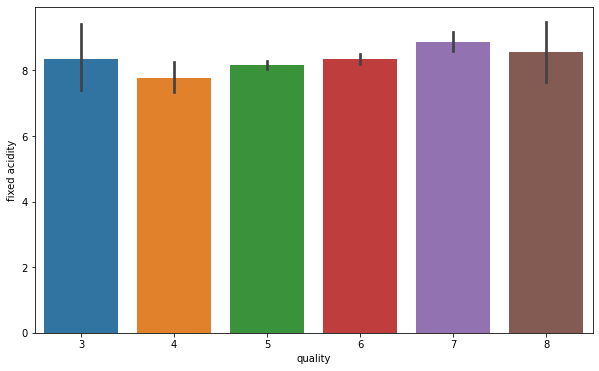

In [8]:
# Generate Barplots to get an idea of the correlation of the features to quality. This information will be used later in
# in the predictive model.
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'fixed acidity', data = wine)

It can be seen that there is a downward trend for volatile acidity and quality. This demonstrated the meaning that the lower the volatile acidity the higher the quality of wine. This makes sense because nobody likes sour grapes.

MIN VOLATILE ACIDITY LEVEL:  1.58


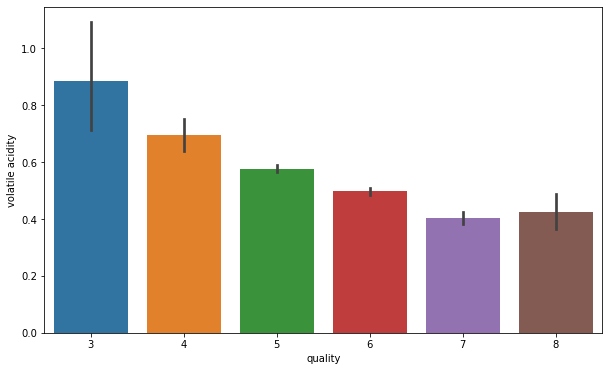

In [9]:
# There is a downward trend for volatile acidity
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)
print("MIN VOLATILE ACIDITY LEVEL: ", wine['volatile acidity'].max())

MAX CITRIC ACID LEVEL:  1.0


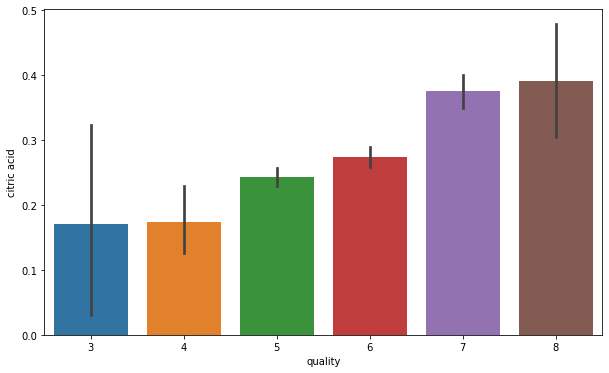

In [10]:
# There is an upward trend for citric acid
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'citric acid', data = wine)
print("MAX CITRIC ACID LEVEL: ", wine['citric acid'].max())

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

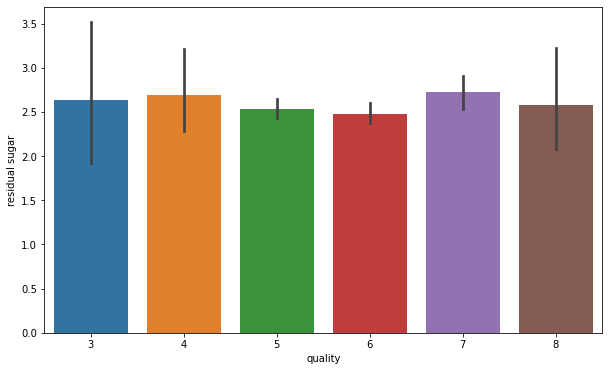

In [11]:
# No trend
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'residual sugar', data = wine)

MIN CHLORIDES LEVEL:  0.611


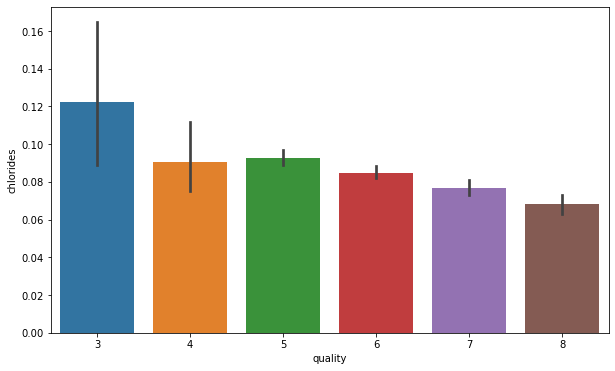

In [12]:
# Slight downward trend
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'chlorides', data = wine)
print("MIN CHLORIDES LEVEL: ", wine['chlorides'].max())

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

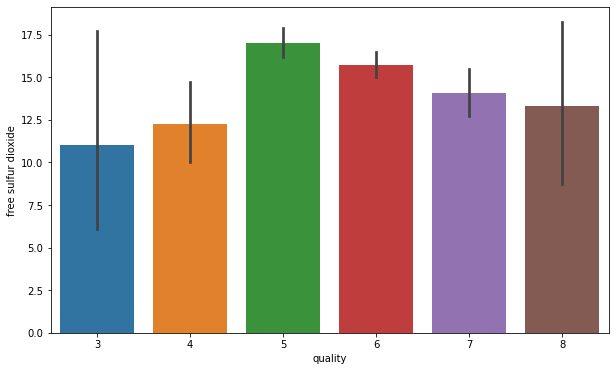

In [13]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

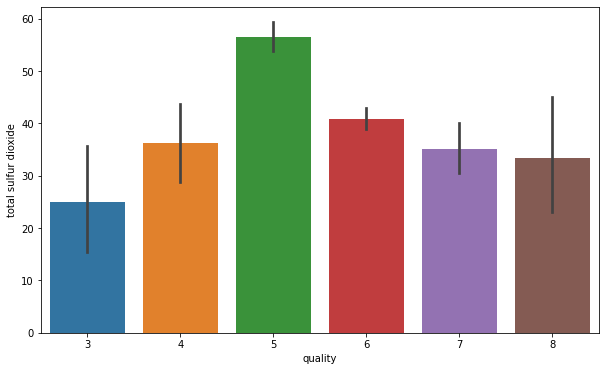

In [14]:
# You would be able to taste it in the nose of the wine for a quality 5 wine...it looks like having the wine near 30ppm is ideal for an excellent wine
# which might make sense because it is used to combat microbial growth in the wine
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

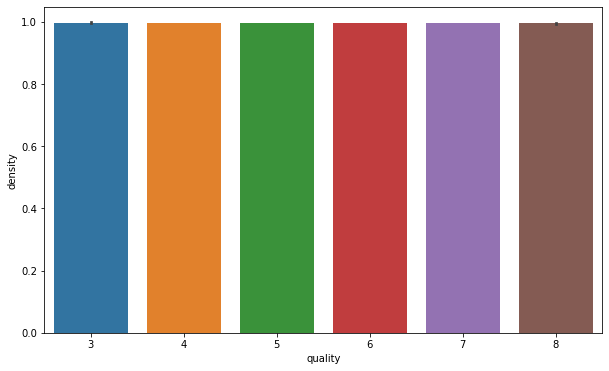

In [15]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'density', data = wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

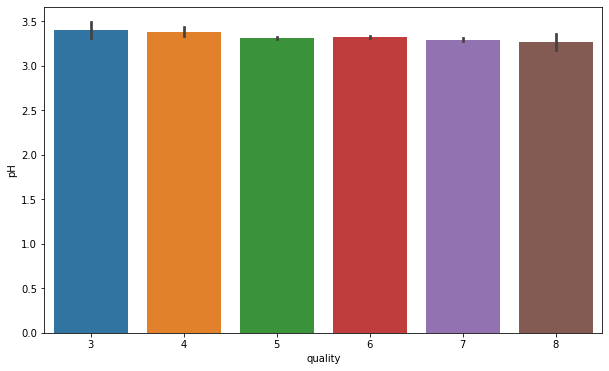

In [16]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'pH', data = wine)

MAX SULPHATE LEVEL:  2.0


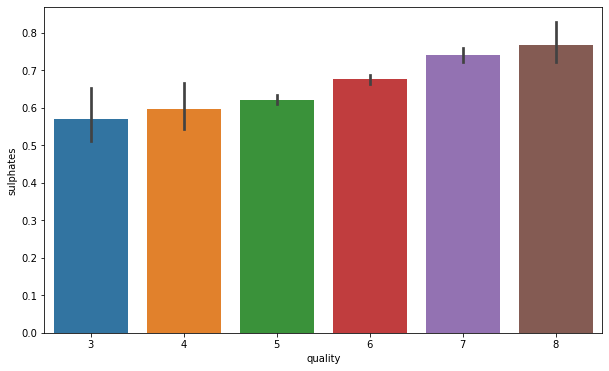

In [17]:
# upward trend in sulphates
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'sulphates', data = wine)
print("MAX SULPHATE LEVEL: ", wine['sulphates'].max())

MAX ALCOHOL LEVEL:  14.9


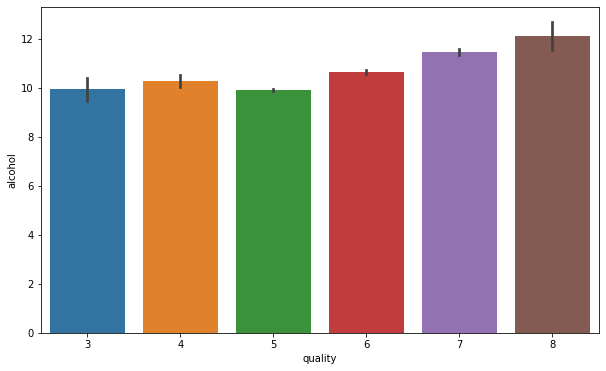

In [18]:
# upward trend in alcohol
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'alcohol', data = wine)
print("MAX ALCOHOL LEVEL: ", wine['alcohol'].max())

In [19]:
# Make a correlation matrix for heat mapping
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### VGW is interested in the quality correlation to the other features. In decending order the correlations are as follows:
#### QUALITY
- Alcohol: 0.476166
- Sulphates: 0.251397
- Citric acid: 0.226373
- Fixed acidity: 0.124052
- Residual sugar: 0.013732
- Free sulfur dioxide: -0.050656
- pH: - 0.057731
- Chlorides: -0.128907
- Density: -0.174919
- Total suler dioxide: -0.185100
- Volatile acidity: -0.390558


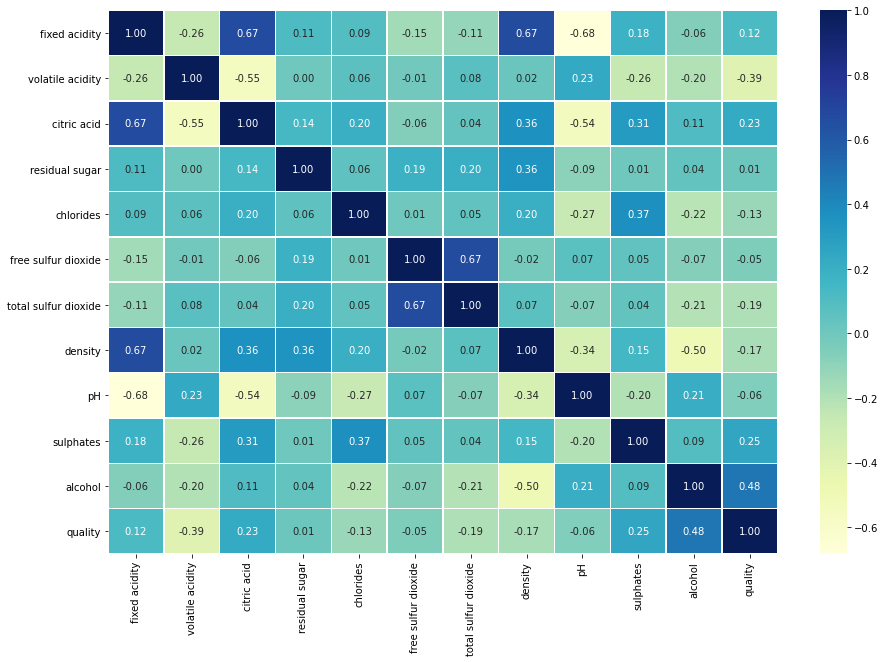

In [20]:
# Visualize Correlation Matrix
corr_matrix = wine.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

A correlation heat map is a descriptive method that was used to analyze the data was a correlation heatmap between the physiochemical input features and the output quality feature. This heat map had the intent of helping the end user visualize which features were more strongly correlated with the quality rating (and other features if they would be interested in that). This gives an idea of which features would be more important to the predictive model that the others. 

The correlation heat map was a great visualization for an overall view of each feature's correlation to quality and all the other features if a stakeholder or data team member is interested in that. 

In [21]:
# count of each target variable
from collections import Counter
Counter(wine['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

Next the notebook visualizes the count of each target variable of the quality of wine. 

<AxesSubplot:xlabel='quality', ylabel='count'>

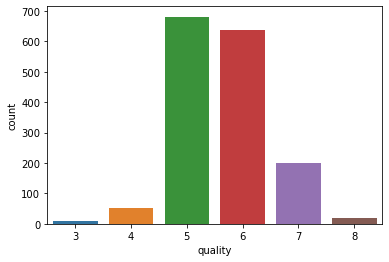

In [22]:
# Two different ways to view the count of quality values of wine
sns.countplot(x='quality', data=wine)

In [23]:
# 98% of the wine can be expected to be rated average
# 1.1% can be expected to be rated poor
# and .63% can be expected to be rated excellent
total_count = 1599
print("POOR %: ", (18/1599)*100)
print("AVERAGE %: ", (1571/1599)*100)
print("EXCELLENT %: ", (10/1599)*100)

POOR %:  1.125703564727955
AVERAGE %:  98.24890556597875
EXCELLENT %:  0.6253908692933083


The count tells the story that most of the wine would be rated as average within the range of 4-7 and that a poor rating would be within the ranges of 1-3 and an excellent wine will rate 8-10. This information makes it clear that a new variable (column) needs to be added to the data to rate the wine accordingly. 

In [24]:
# VGW wants to classify the wine into three categories for pricing...poor, average, and excellent. These next few cells will add a Ratings column to our data set.
# 1 - Poor
# 2 - Average
# 3 - Excellent
# Based on what the data says in the counter the wine will be classified in the following ways:
# 1,2,3 --> Poor
# 4,5,6,7 --> Average
# 8,9,10 --> Excellent

# Create an empty list called Rating to hold the rating buckets
ratings = []

for i in wine['quality']:
    if i >= 1 and i <= 3:
        ratings.append('1')
    elif i >= 4 and i <= 7:
        ratings.append('2')
    elif i >= 8 and i <= 10:
        ratings.append('3')
wine['rating'] = ratings

#view final data
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')

In [25]:
# check that ratings are added 
wine['rating'].unique()

array(['2', '3', '1'], dtype=object)

In [48]:
# Use ANOVA to test for statistical significance
# ANOVA test
import scipy.stats as stats

# create a list of continuous_variables that hold the feature names
df_features = wine.drop('rating', axis=1)
continuous_variables = list(wine.columns)
for var in continuous_variables:    
    result = stats.f_oneway(wine[var][wine['rating'] == '1'], 
                            wine[var][wine['rating'] == '2'],
                            wine[var][wine['rating'] == '3'])
    print(var)
    print(result)

fixed acidity
F_onewayResult(statistic=0.18614039573142813, pvalue=0.8301750559234913)
volatile acidity
F_onewayResult(statistic=23.580388375974, pvalue=8.08269803552242e-11)
citric acid
F_onewayResult(statistic=4.773709602326406, pvalue=0.008569996921634399)
residual sugar
F_onewayResult(statistic=0.030556573358118982, pvalue=0.9699061271078092)
chlorides
F_onewayResult(statistic=4.257783230363484, pvalue=0.014314752539066524)
free sulfur dioxide
F_onewayResult(statistic=1.6687490065916035, pvalue=0.18881140463673857)
total sulfur dioxide
F_onewayResult(statistic=3.631536526494548, pvalue=0.026694484266209424)
density
F_onewayResult(statistic=6.7571078004141345, pvalue=0.0011961344791262837)
pH
F_onewayResult(statistic=2.3149384876124413, pvalue=0.09910382557150468)
sulphates
F_onewayResult(statistic=5.1566426754067605, pvalue=0.005857378680196306)
alcohol
F_onewayResult(statistic=23.954850882505546, pvalue=5.6186624193659465e-11)
quality
F_onewayResult(statistic=155.81082250270404, p

Features that are statistically significant to predicting the quality rating of our wine are those that have a p-value of <= 0.05. As we can see not all features are statistically significant to predicting the rating of the wine. Let's keep them all for now and see the results of our model. If the model predicts with > 95% accuracy I see no harm in keeping all the features as input parameters for our final output model. 



## Modeling

In [26]:
# Split the x and y variables
X = wine.iloc[:,:11]
y = wine['rating']

In [27]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: rating, dtype: object

In [28]:
### What makes a wine poor, average, or excellent?
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.25)

In [29]:
# Split the data into train and test data
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [49]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6


In [50]:
y_train.head()

582     2
626     2
1030    2
620     2
490     2
Name: rating, dtype: object

Now that the data is split into training and test sets we can find a machine learning model that can be trained to find patterns in the training set and then test the model using the patterns that were found on the test set.

3 Machine Learning models are typical for calssification promblems:

1. Logitic Regression
> Logit(pi) = 1/(1+ exp(-pi))
ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k <br>
Resource: https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,bounded%20between%200%20and%201.
2. K-Nearest Neighbors Classifier
> dist(x,z)=(∑r=1d|xr−zr|p)1/p. <br>
Resource: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html#:~:text=The%20k%2Dnearest%20neighbor%20classifier,%7Cp)1%2Fp.
3. Random Forest Classifier
> 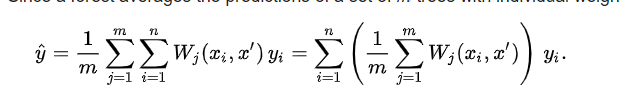
Resource: https://en.wikipedia.org/wiki/Random_forest

and we will try them here and make a decision based on the results.

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

# 98.5% accuracy with Logistic Regression! 

[[  0   1   0]
 [  0 394   0]
 [  0   5   0]]
98.5


In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

#print confusion matrix and accuracy score
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print(knn_conf_matrix)
print(knn_acc_score*100)

[[  0   1   0]
 [  0 394   0]
 [  0   5   0]]
98.5


In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   1   0]
 [  1 393   0]
 [  0   5   0]]
98.25


## Logistic Regression is the recommended model to use in this case
Argue your case v KNN here

Now that a baseline model has been selected and the accuracy is more than enough to meet the VGW metric goal lets look at feature importance:


### Feature Importance

<AxesSubplot:>

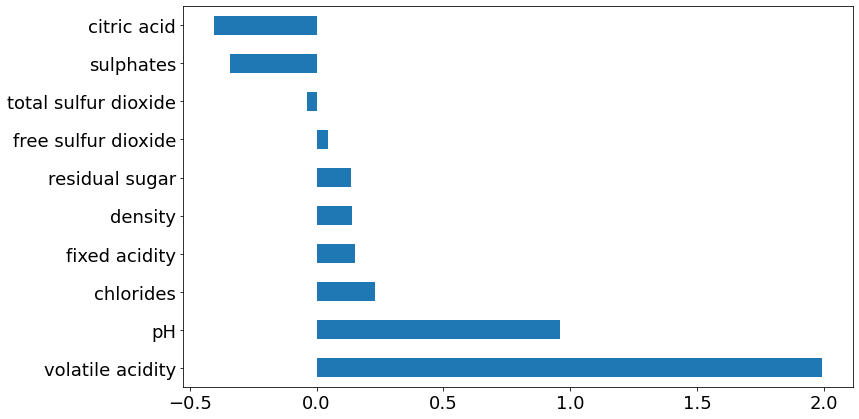

In [35]:
# get importance
importance = lr.coef_[0]
    
# plot feature importance
(pd.Series(importance, index=X.columns)
   .nlargest(10)
   .plot(kind='barh', figsize=(12, 7), fontsize=18))

Here is a visualization of the feature importance to predicting wine quality with Logistic Regression. It can be seen that not all features are important to predicting wine quality but those that are give results are 98.5% accuracy. This model is ready to ship to production for VGW to use as a tool in their business. 

In [36]:
# Save the Logitic Regression Classification model for use in the front end
import pickle

# save the model to disk
filename = 'updated_model.sav'
pickle.dump(lr, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(loaded_model.predict([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]))
print(result*100)

['1']
98.5


In [37]:
# find max values for all quality ratings
max_value = wine.groupby('quality').max().reset_index()
for index, row in max_value.iterrows():
    print(row)

quality                      3
fixed acidity             11.6
volatile acidity          1.58
citric acid               0.66
residual sugar             5.7
chlorides                0.267
free sulfur dioxide         34
total sulfur dioxide        49
density                 1.0008
pH                        3.63
sulphates                 0.86
alcohol                     11
rating                       1
Name: 0, dtype: object
quality                     4
fixed acidity            12.5
volatile acidity         1.13
citric acid                 1
residual sugar           12.9
chlorides                0.61
free sulfur dioxide        41
total sulfur dioxide      119
density                 1.001
pH                        3.9
sulphates                   2
alcohol                  13.1
rating                      2
Name: 1, dtype: object
quality                       5
fixed acidity              15.9
volatile acidity           1.33
citric acid                0.79
residual sugar             15.5
c

In [38]:
# find minimum values for all quality ratings
max_value = wine.groupby('quality').min().reset_index()
for index, row in max_value.iterrows():
    print(row)

quality                       3
fixed acidity               6.7
volatile acidity           0.44
citric acid                   0
residual sugar              1.2
chlorides                 0.061
free sulfur dioxide           3
total sulfur dioxide          9
density                 0.99471
pH                         3.16
sulphates                   0.4
alcohol                     8.4
rating                        1
Name: 0, dtype: object
quality                      4
fixed acidity              4.6
volatile acidity          0.23
citric acid                  0
residual sugar             1.3
chlorides                0.045
free sulfur dioxide          3
total sulfur dioxide         7
density                 0.9934
pH                        2.74
sulphates                 0.33
alcohol                      9
rating                       2
Name: 1, dtype: object
quality                       5
fixed acidity                 5
volatile acidity           0.18
citric acid                   0
residua

Based on the information above we can see that the maximium values for the quality ratings are:

# POOR  
Rating: 3

| FEATURE      | MAX | MIN | CORRELATION
| :----------- | :-----------: | :-----------: | -----------: |
| fixed acidity        |      11.6    |    6.7     |      ? |
| volatile acidity     |      1.58    |    0.44    |      - | 
| citric acid          |      0.66    |    0       |      + | 
| residual sugar       |       5.7    |    1.2     |      ? |
| chlorides            |     0.267    |    0.061   |      - |
| free sulfur dioxide  |        34    |    3       |      ? |
| total sulfur dioxide |        49    |    9       |      ? |
| density              |    1.0008    |    0.99471 |      ? |
| pH                   |      3.63    |    3.16    |      ? |
| sulphates            |      0.86    |    0.4     |      + |
| alcohol              |        11    |    8.4     |      + |



# AVERAGE
Rating: 4-7

| FEATURE      | MAX | MIN | CORRELATION
| :----------- | :-----------: | :-----------: | -----------: |
| fixed acidity        |      15.9   |    4.6     |      ? |
| volatile acidity     |      1.33    |    0.12    |      - | 
| citric acid          |      1.0    |    0       |      + | 
| residual sugar       |      15.9    |    0.9    |      ? |
| chlorides            |      0.61    |    0.012   |      - |
| free sulfur dioxide  |        72    |    1       |      ? |
| total sulfur dioxide |        289    |    6       |      ? |
| density              |    1.0032    |    0.99007 |      ? |
| pH                   |      4.01    |    2.74    |      ? |
| sulphates            |      1.98    |    0.33     |      + |
| alcohol              |        14    |    9     |      + |



# EXECELLENT
Rating: 8

| FEATURE      | MAX | MIN | CORRELATION
| :----------- | :-----------: | :-----------: | -----------: |
| fixed acidity        |      12.6   |    5     |      ? |
| volatile acidity     |      0.85    |    0.26    |      - | 
| citric acid          |      0.72    |    0.03      |      + | 
| residual sugar       |      6.4    |    1.4    |      ? |
| chlorides            |      0.086    |    0.044   |      - |
| free sulfur dioxide  |        42    |    3       |      ? |
| total sulfur dioxide |        88    |    12       |      ? |
| density              |    0.9988    |    0.9908 |      ? |
| pH                   |      3.72    |    2.88    |      ? |
| sulphates            |      1.1    |    0.63     |      + |
| alcohol              |       14    |    9.8     |      + |

## The above values in the charts are the values that will be used as parameters for the inputs form the end user in the web application. 

# Testing
The following section is for testing the model. Data from each row within the Excellent and Poor tables were input into the web application to test for accuracy. The results of testing in production are that the model works as expected within the web application.

In [39]:
wine.loc[wine['quality'] == 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,3
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,3
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,3
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,3
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,3
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,3
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,3
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,3
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,3
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8,3


In [40]:
wine.loc[wine['rating'] == '1']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,1
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,1
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,1
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,1
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,1
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,1
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,1
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,1
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,1
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,1


In [41]:
# Test for a poor wine -- pass
loaded_model.predict([[2,2,2,2,2,2,2,2,2,2,2]])

array(['1'], dtype=object)

In [42]:
# Test for average wine using mean values of described data -- passed
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
loaded_model.predict([[8.3, .52, .27, 2.5, .08, 15.8, 46.6, .996747, 3.311113, .66, 10.422]])

array(['2'], dtype=object)

In [44]:
# Test for excellent wine using "one off data" from the execellent row 455 table above -- fails here, passes in web application
# 7.9	0.35	0.46	3.6	0.078	15.0	37.0	0.99730	3.35	0.86	12.8	

loaded_model.predict([[7.9, .35, .46, 3.6, .078, 6.0, 37.0, .99730, 3.35, .86, 12.8]])

array(['2'], dtype=object)

## Web Application Testing (Production)
The web application testing followed the industry standards checklist:
1)	Functionality Testing
2)	Usability
3)	Interface Testing
4)	Compatibility Testing
5)	Performance Testing
6)	Security Testing

During functionality testing all the form and its inputs were tested by adding a temporary line of python code that returned the values from the for POST after pressing the Submit button on the form. The button, which is actually a link in the HTML Flask Template, was tested to make sure it went back to the form (index.html template) page. The form also was tested to see that the error message would show if something went wrong with the input. 

During usability testing the website was looked over for ease of use, clarity of the instructions, that the instructions provided satisfied the products purpose, the buttons were clear and easy to find, the error message was clear, and the design was consistent on both the index.html and rating.html template pages.

During interface testing the web server and application server were tested to show the correct error pages.

During the compatibility testing the website passed for testing in several browsers, on a Windows OS and an Apple OS and for mobile on Android and iOS mobile OS’s.
During the performance testing the load time was under a few seconds.
During security testing the form was tested for SQL injection codes and passed. 


# Data Summary and Implications
E.  Summarize the implications of your data analysis by discussing the results of your data analysis in the context of the research question, including one limitation of your analysis. Within the context of your research question, recommend a course of action based on your results. Then propose two directions or approaches for future study of the data set.

The research question: "Can the quality of wine be accurately predicted for three categories of poor, average, and excellent?" can be answered from the data analysis as: VGW can predict the quality rating of wine with over 98% accuracy to help better label and sell their wine to consumers. 

The web application can be accessed at this link: https://wine-quality-classifier.herokuapp.com/

Limitations of the data analysis include but are not limited to the amount of data available, possible data drift, and access to stakeholders in the company. In general, more data comes more insights and better outcomes of machine learning models. The data is from years ago which means the physiochemical properties of the wine represent those of a different time and with more recent data the model could give different results based more recent information about the physiochemical properties of the wine. Lastly, with direct access to stakeholders it could be determined which features could be dropped as input parameters from the web application, if there is any insights on outliers within the data, and anything else that could not be easily extracted from standard data analysis practices. 

Two possible directions or approaches for future study of the data set are to:
1. Gather fresher data and see if there is drift in the current data and if the results have changed with new information
2. An approach would be to use backward feature selection to increase the accuracy of the model

## User’s Guide
### Installation
#### Environment
1.	Install Anaconda (https://docs.anaconda.com/anaconda/install/)
    a. Anaconda is necessary to run Jupyter Notebook and includes a download of the most recent version of Python 
    b. Follow the instructions in the link above
    c. Contact technical support if you have issues
2.	Install Jupyter Notebook (https://jupyter.org/install)
    a. Jupyter Notebook is necessary to run the Jupyter Notebook which includes the data analytics, visualizations, and the predictive model
    b. Follow the instructions in the link above
    c. Contact technical support if you have issues
3.	Install PyCharm Community IDE (https://www.jetbrains.com/help/pycharm/installation-guide.html#toolbox) 
    a. PyCharm is necessary to run the Web Application locally. This should only be done by a developer on your team.
    b. Follow the instructions in the link above
    c. Contact technical support if you have issues
4.	If none exists, install a web browser
5.	Connect to the internet
### Use
1.	vgw-wine-prediction (root folder) received from submission is the zipped folder containing the Jupyter Notebook and the Web Application. 
2.	To run the Jupyter Notebook
a.	Unzip the root folder
b.	Open the Jupyter Notebook application
c.	A web browser will open with the file structure of your operating system…within this browser find the unzipped root folder
d.	Open the root folder
e.	Open the Jupyter Notebook sub folder
f.	Click the vgw-wine-prediction.ipynb file
g.	Click the button that looks like a fast forward arrow to run all the cells of the notebook and see the visualizations 
3.	The web application can be seen in any web browser at the following address https://wine-quality-classifier.herokuapp.com/ 


F.  Acknowledge sources, using in-text citations and references, for content that is quoted.
1. https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,bounded%20between%200%20and%201
2. https://en.wikipedia.org/wiki/Random_forest
3. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html#:~:text=The%20k%2Dnearest%20neighbor%20classifier,%7Cp)1%2Fp
 

G.  Demonstrate professional communication in the content and presentation of your submission.